# Data visualization

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
import geopandas

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Reading data

In [3]:
cleaned_data = pd.read_csv('./data/cleaned_data.csv')
cleaned_data

,company,company_size,job_title,level,domain,yoe_total,yoe_at_company,base,stock,bonus,total_compensation,location
0,Logitech,7250,Software Engineer,I4,Testing (SDET),10,5,190000.0,10000.0,0.0,200000.0,San Francisco Bay Area
1,Logitech,7250,Software Engineer,I2,ML / AI,4,3,126000.0,0.0,7000.0,133000.0,"Vancouver, WA"
2,Logitech,7250,Software Engineer,I3,Testing (SDET),11,11,120000.0,5000.0,12000.0,137000.0,"San Francisco, CA"
3,Logitech,7250,Software Engineer,I4,Production,8,8,100000.0,10000.0,0.0,110000.0,"Hsin-chu, TP, Taiwan"
4,Logitech,7250,Software Engineer,I1,ML / AI,2,0,123100.0,0.0,0.0,123100.0,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,Ubisoft,21620,Software Engineering Manager,L3,Video Game,13,13,80400.0,0.0,0.0,80400.0,"Bordeaux, AQ, France"
1246,Ubisoft,21620,Software Engineering Manager,L4,API Development (Back-End),10,1,115300.0,0.0,11500.0,126800.0,"Montreal, QC, Canada"
1247,Ubisoft,21620,Software Engineering Manager,L3,Other,12,12,73900.0,0.0,0.0,73900.0,"Paris, IL, France"
1248,Ubisoft,21620,Software Engineering Manager,L4,Full Stack,20,9,125000.0,0.0,5000.0,130000.0,"Montreal, QC, Canada"


## Visualization

### Single variable

**Define:** Get top 10 company of each category (average values of a category)

In [14]:
# Preprocessing
copy_data = cleaned_data.copy()
copy_data.drop(["company_size", "job_title", "level", "domain", "location"], inplace=True, axis='columns')
copy_data

,company,yoe_total,yoe_at_company,base,stock,bonus,total_compensation
0,Logitech,10,5,190000.0,10000.0,0.0,200000.0
1,Logitech,4,3,126000.0,0.0,7000.0,133000.0
2,Logitech,11,11,120000.0,5000.0,12000.0,137000.0
3,Logitech,8,8,100000.0,10000.0,0.0,110000.0
4,Logitech,2,0,123100.0,0.0,0.0,123100.0
...,...,...,...,...,...,...,...
1245,Ubisoft,13,13,80400.0,0.0,0.0,80400.0
1246,Ubisoft,10,1,115300.0,0.0,11500.0,126800.0
1247,Ubisoft,12,12,73900.0,0.0,0.0,73900.0
1248,Ubisoft,20,9,125000.0,0.0,5000.0,130000.0


In [22]:
# Get top 10 company of each category
def get_top_10_company(data, category):
    top_10_company = pd.DataFrame()
    top_10_company[category] = data.groupby("company")[category].mean()
    top_10_company = top_10_company.sort_values(by=category ,ascending=False).head(10)
    return top_10_company

categories = ["yoe_total", "yoe_at_company", "base", "stock", "total_compensation"]

dataList = []

for category in categories:
    top_10_company = get_top_10_company(copy_data, category)
    dataList.append(top_10_company)

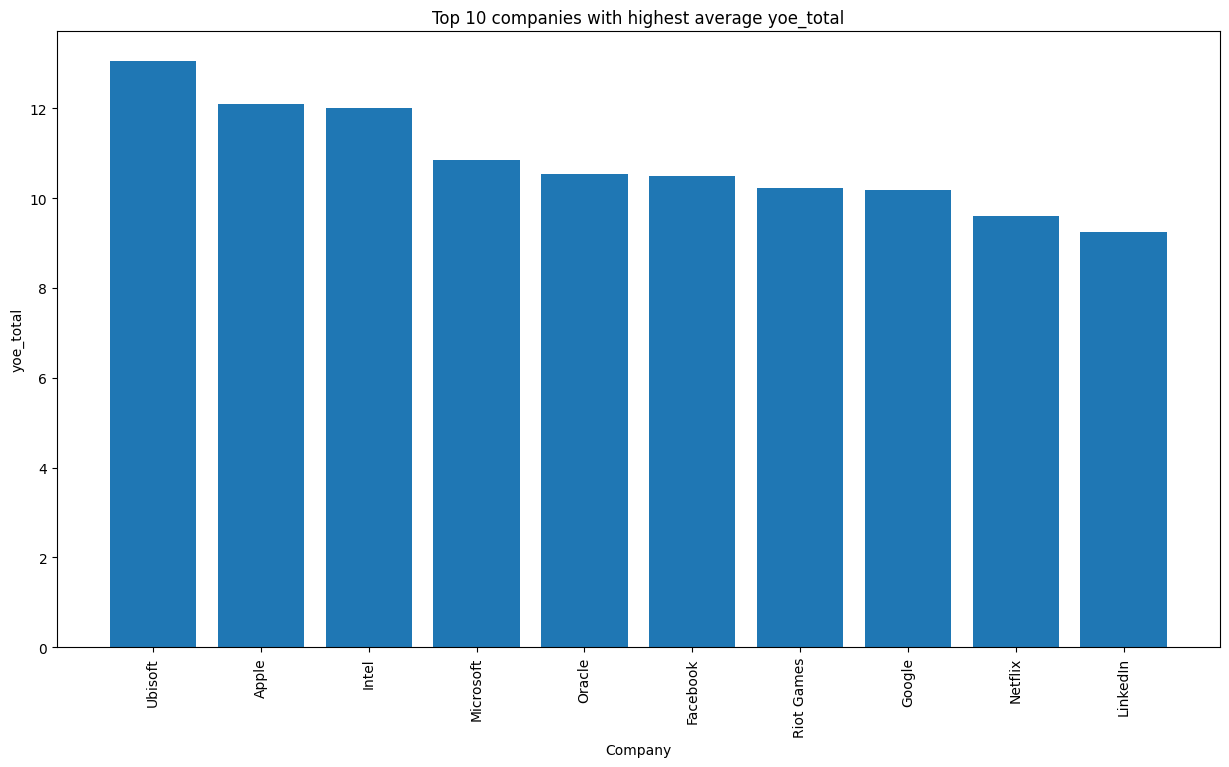

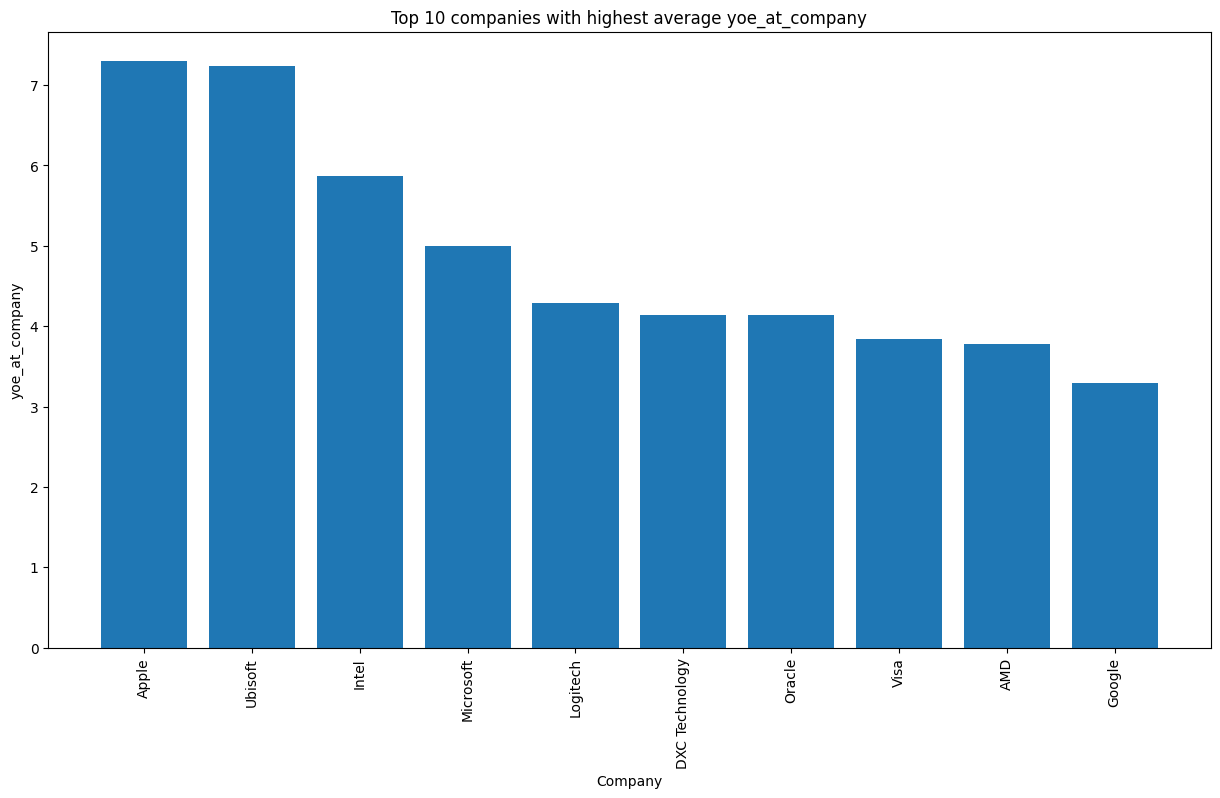

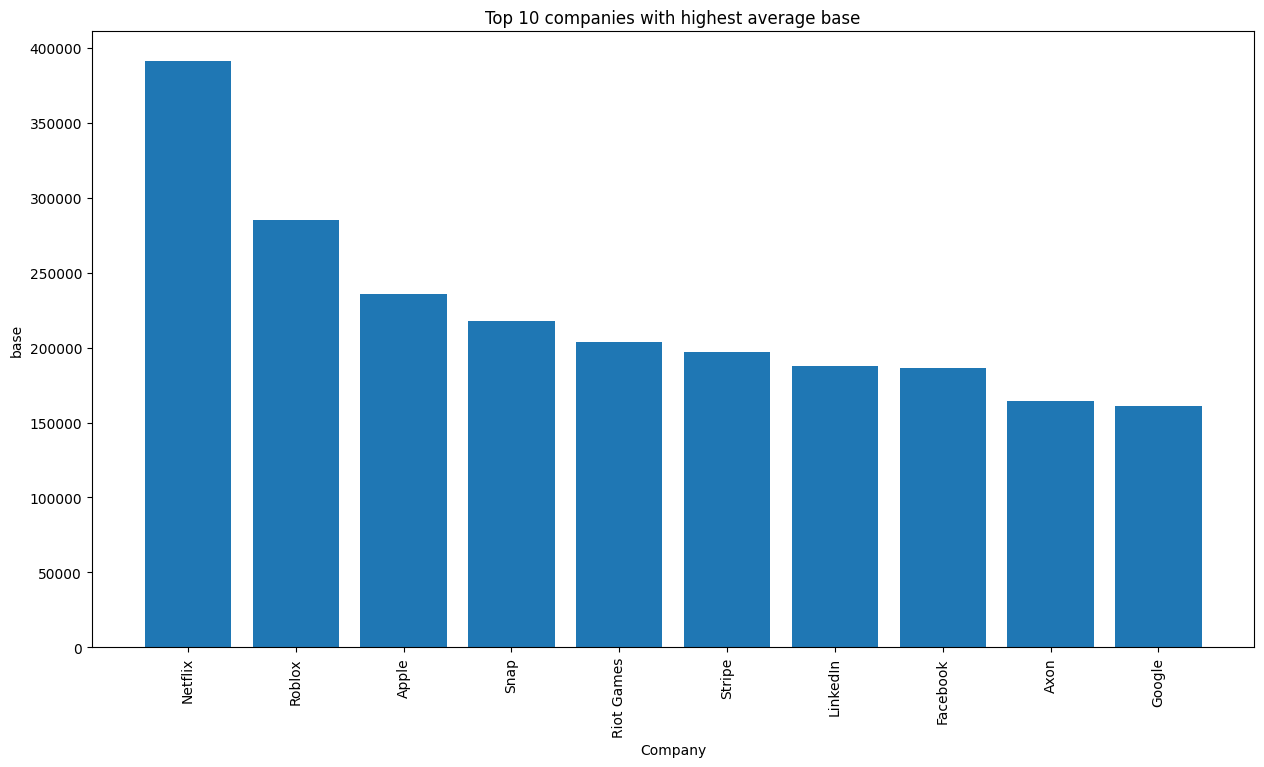

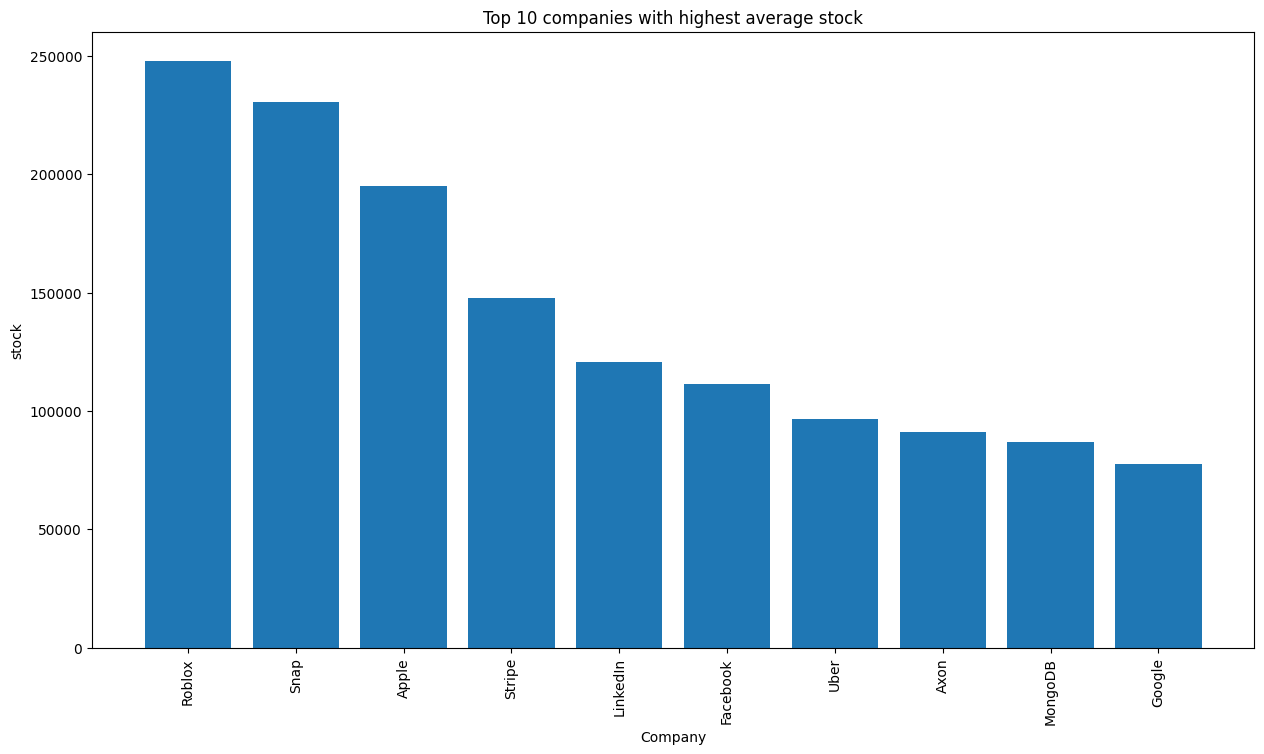

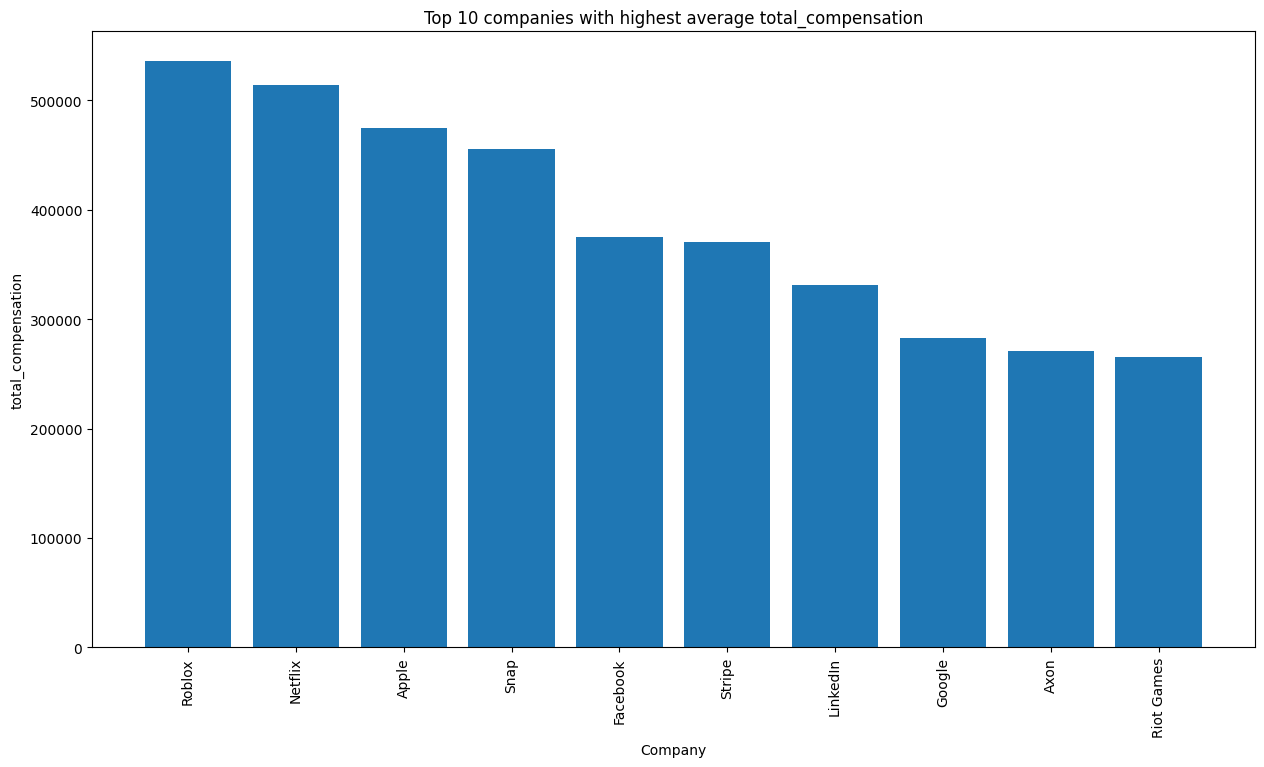

In [24]:
# Visualize top 10 company of each category
for data in dataList:
    plt.figure(figsize=(15, 8))
    plt.bar(data.index, data.iloc[:, 0])
    plt.xticks(rotation=90)
    plt.xlabel("Company")
    plt.ylabel(data.columns[0])
    plt.title("Top 10 companies with highest average " + data.columns[0])
    plt.show()

### Relationships between variables

In [ ]:
def display_scatter_plot(df, col1, col2):
	plt.figure(figsize=(10, 5))
	plt.scatter(df[col1], df[col2], color='skyblue', alpha=0.7)
	plt.xlabel(col1)
	plt.ylabel(col2)
	plt.title(f'{col1} vs {col2}')

	m = (df[col2].max() - df[col2].min()) / (df[col1].max() - df[col1].min())
	b = df[col2].mean() - m * df[col1].mean()
	plt.plot(df[col1], m * df[col1] + b, color='red')
	plt.show()

for col1 in df.columns[1:]:
	for col2 in df.columns[1:]:
		if col1 != col2:
			display_scatter_plot(df, col1, col2)